In [1]:
import numpy as np
import gym
import random
import time
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

In [2]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array')
#env = gym.make("FrozenLake-v1", render_mode='rgb_array', map_name="8x8")
env.reset()

(0, {'prob': 1})

In [3]:
def visualize(env):
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
def report(num_episodes, rewards_all_episodes, steps_all_episodes):
    # Calculate and print the average rewards per thousand episodes
    rewards = np.array_split(np.array(rewards_all_episodes), num_episodes/num_episodes)
    count = num_episodes
    #print("******* Average reward per thousands episodes ************")
    #for r in rewards_per_thousands_episodes:
     #   print(count, ": ", str(sum(r/num_episodes)))
      #  count += num_episodes
    plt.plot(rewards_all_episodes)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()
    
    plt.plot(steps_all_episodes)
    plt.xlabel('Episode')
    plt.ylabel('Number of steps')
    plt.show()
    
    print("Средняя награда ", sum(rewards_all_episodes)/len(rewards_all_episodes))
    print("Среднее количество шагов ", sum(steps_all_episodes)/len(steps_all_episodes))

state_space_size = env.observation_space.n
action_space_size = env.action_space.n

#Creating a q-table and intialising all values as 0
q_table = np.zeros((state_space_size,action_space_size))
#Number of episodes
num_episodes = 1000
#Max number of steps per episode
max_steps_per_episode = 1000

learning_rate = 0.1
discount_rate = 0.99

#Greedy strategy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

In [4]:
action = env.action_space.sample()
action

0

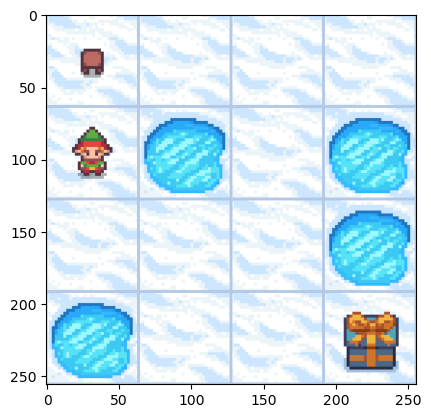

In [ ]:
rewards_all_episodes = []
steps_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        visualize(env)
        action = env.action_space.sample()
        new_state, reward, terminated, truncated, info = env.step(action)
        
        done = truncated or terminated
        rewards_current_episode += reward
        if done == True:
            #visualize(env)
            break
        
            
    rewards_all_episodes.append(rewards_current_episode)
    steps_all_episodes.append(step)
    #print("Эпизод %3d завершился за %3d шагов %s" % (episode, step, ("УСПЕХ" if rewards_current_episode > 0.0 else "")))

report(num_episodes, rewards_all_episodes, steps_all_episodes)
env.close()

num_episodes= 1000 max_steps_per_episode= 1000


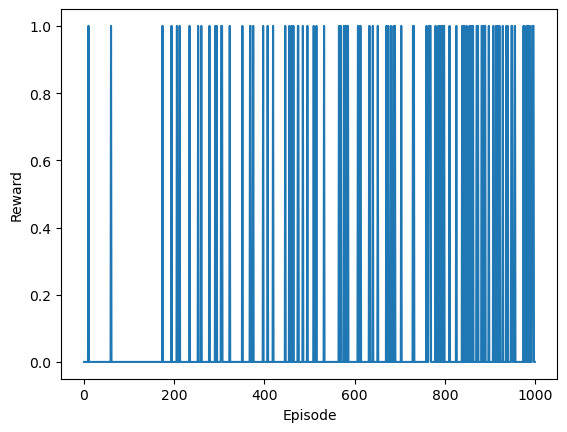

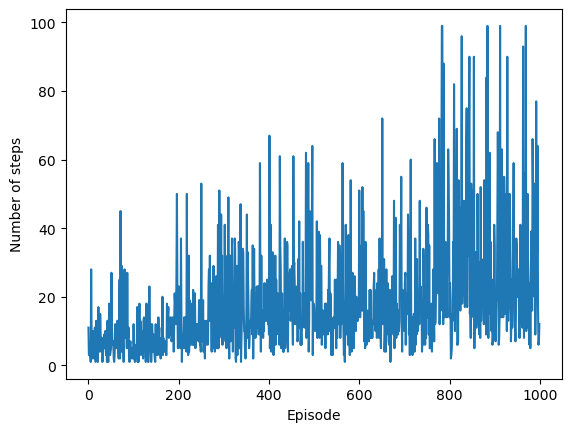

Средняя награда  0.114
Среднее количество шагов  18.835


********* Q-table *************

[[1.68890160e-01 8.40821614e-02 8.27855503e-02 6.71186176e-02]
 [1.96452402e-04 4.18454249e-02 3.04859354e-04 2.44768134e-05]
 [3.25985662e-04 6.22901914e-04 1.76778240e-02 2.66554781e-04]
 [3.32966214e-03 1.41317255e-04 1.53314975e-05 8.40106165e-05]
 [1.80938975e-01 3.37459403e-02 4.48214527e-02 7.19756953e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.46990242e-02 6.19494901e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.82147693e-02 7.50295697e-02 6.04513667e-02 2.15846340e-01]
 [2.84470719e-02 2.62581733e-01 5.21598250e-02 2.04566626e-02]
 [4.07851972e-02 2.54179826e-01 5.82232134e-02 3.84277927e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.06461912e-02 1.48887060e-02 7.20339375e-02 3.15037572e-01]
 [2.74375243e-02 6.44566995

In [27]:
rewards_all_episodes = []
steps_all_episodes = []
q_table = np.zeros((state_space_size,action_space_size))
num_of_learning = 0
print("num_episodes=", num_episodes, "max_steps_per_episode=", max_steps_per_episode)
#Q-Learning Algorithm
for episode in range(num_episodes):
    state, hz = env.reset()    
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        
        #Exploration-exploitation trade off
        exploration_rate_threshold = random.uniform(0,1)
        #visualize(env)
        
        #if exploration_rate_threshold < 0.3:
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            
        new_state, reward, terminated, truncated, info = env.step(action)
        done = truncated | terminated
        if reward > 0.0:
            #reward = max_steps_per_episode * 1.0 / (step + 1)
            reward = 1.0
        #Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, int(action)] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        state = new_state
        rewards_current_episode += reward
        if done == True:
            #visualize(env)
            break
    
    #print("Эпизод %3d завершился за %3d шагов %s" % (episode, step, ("УСПЕХ" if rewards_current_episode > 0.0 else "")))
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    steps_all_episodes.append(step)
    
env.close()
report(num_episodes, rewards_all_episodes, steps_all_episodes)

# Print updated Q-table
print("\n\n********* Q-table *************\n")
print(q_table)

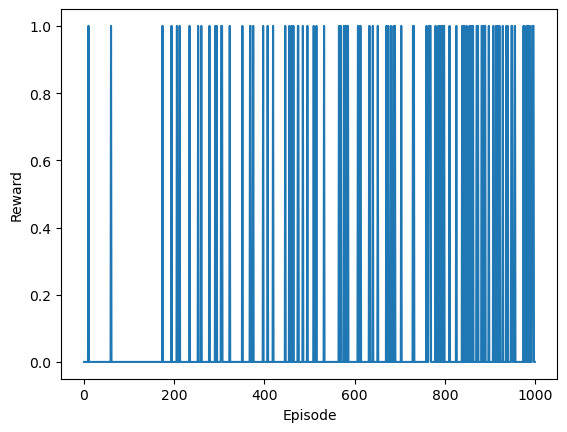

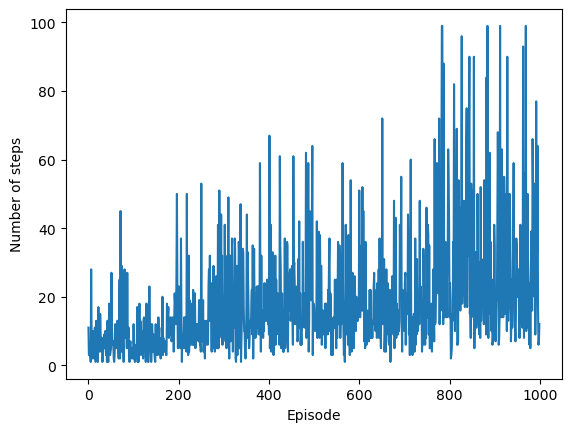

Средняя награда  0.114
Среднее количество шагов  18.835


********* Q-table *************

[[1.68890160e-01 8.40821614e-02 8.27855503e-02 6.71186176e-02]
 [1.96452402e-04 4.18454249e-02 3.04859354e-04 2.44768134e-05]
 [3.25985662e-04 6.22901914e-04 1.76778240e-02 2.66554781e-04]
 [3.32966214e-03 1.41317255e-04 1.53314975e-05 8.40106165e-05]
 [1.80938975e-01 3.37459403e-02 4.48214527e-02 7.19756953e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.46990242e-02 6.19494901e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.82147693e-02 7.50295697e-02 6.04513667e-02 2.15846340e-01]
 [2.84470719e-02 2.62581733e-01 5.21598250e-02 2.04566626e-02]
 [4.07851972e-02 2.54179826e-01 5.82232134e-02 3.84277927e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.06461912e-02 1.48887060e-02 7.20339375e-02 3.15037572e-01]
 [2.74375243e-02 6.44566995

In [28]:
report(num_episodes, rewards_all_episodes, steps_all_episodes)
# Print updated Q-table
print("\n\n********* Q-table *************\n")
print(q_table)

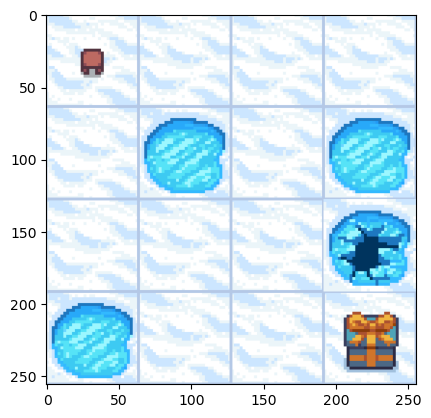

In [31]:
state, hz = env.reset()    
done = False #Tells us whether episode is finished
rewards_current_episode = 0
for step in range(max_steps_per_episode): #Contains that happens in a time step
        
    #Exploration-exploitation trade off
    exploration_rate_threshold = random.uniform(0,1)
    visualize(env)
        
    if exploration_rate_threshold > 0.001:
    #if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
    else:
        action = env.action_space.sample()
            
    new_state, reward, terminated, truncated, info = env.step(action)
    done = truncated | terminated
    if reward > 0.0:
        #reward = max_steps_per_episode * 1.0 / (step + 1)
        reward = 1.0
    #Update Q-table for Q(s,a)
    #q_table[state, action] = q_table[state, int(action)] * (1 - learning_rate) + \
    #    learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    state = new_state
    rewards_current_episode += reward
    if done == True:
        visualize(env)
        break

In [20]:
#Q-Learning Algorithm
for episode in range(10): #Contains that happens in an episode
    state, hz = env.reset()    
    done = False #Tells us whether episode is finished
    rewards_current_episode = 0
    for step in range(max_steps_per_episode): #Contains that happens in a time step
        
        #Exploration-exploitation trade off
        exploration_rate_threshold = random.uniform(0,1)
        #visualize(env)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
            new_state, reward, terminated, truncated, info = env.step(action)
            done = truncated | terminated
            #Update Q-table for Q(s,a)
            q_table[state, action] = q_table[state, int(action)] * (1 - learning_rate) + \
                learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            state = new_state
            rewards_current_episode += reward
            if done == True:
                #visualize(env)
                break
    
    print("Эпизод %2d завершился за %2d шагов %s" % (episode, step, ("УСПЕХ" if rewards_current_episode > 0.0 else "")))
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    
env.close()

Эпизод  0 завершился за 999 шагов 
Эпизод  1 завершился за 12 шагов 
Эпизод  2 завершился за 22 шагов 
Эпизод  3 завершился за  1 шагов 
Эпизод  4 завершился за 10 шагов 
Эпизод  5 завершился за  1 шагов 
Эпизод  6 завершился за  1 шагов 
Эпизод  7 завершился за  6 шагов 
Эпизод  8 завершился за  4 шагов 
Эпизод  9 завершился за  7 шагов 
